Importing all the packages that will be necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import warnings
warnings.filterwarnings("ignore") # this will turn off all the warnings from the frameworks


Combining all the item's csv files in one dataframe

In [2]:
owd = os.getcwd() #saving in a variable the original directory

os.chdir("data\item") #accessing the directory from the item's files
extension = 'csv' #extension of the files
all_filenames_item = [i for i in glob.glob('*.{}'.format(extension))] #transforming in a list all the filenames from the directory
combined_item = pd.concat([pd.read_csv(f) for f in all_filenames_item ]) #combine all files in the list



Combining all the licitacao's csv files in one dataframe

In [3]:
os.chdir(owd) #returning to the original directory
os.chdir("data\licitacao") #accessing the directory from the item's files
extension = 'csv' #extension of the files
all_filenames_licit = [i for i in glob.glob('*.{}'.format(extension))] #transforming in a list all the filenames from the directory
combined_licit = pd.concat([pd.read_csv(f) for f in all_filenames_licit ]) #combine all files in the list



In [4]:
combined_licit.head()

,CD_ORGAO,NM_ORGAO,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_COMISSAO,ANO_COMISSAO,TP_COMISSAO,NR_PROCESSO,ANO_PROCESSO,...,TP_DOCUMENTO_FORNECEDOR,NR_DOCUMENTO_FORNECEDOR,TP_DOCUMENTO_VENCEDOR,NR_DOCUMENTO_VENCEDOR,VL_HOMOLOGADO,BL_GERA_DESPESA,DS_OBSERVACAO,PC_TX_ESTIMADA,PC_TX_HOMOLOGADA,BL_COMPARTILHADA
0,84100,PM DE ESPERANÇA DO SUL,1.0,2016,CNV,12.0,2016.0,P,001,2016.0,...,NaN,NaN,J,6233397000148.0,6420.0,S,NaN,NaN,NaN,N
1,84100,PM DE ESPERANÇA DO SUL,4.0,2016,CNV,12.0,2016.0,P,003,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
2,82701,CM DE XANGRI-LÁ,1.0,2016,PRP,12.0,2016.0,G,01,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
3,84100,PM DE ESPERANÇA DO SUL,6.0,2016,CNV,12.0,2016.0,P,005,2016.0,...,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN,N
4,63900,PM DE COTIPORÃ,36.0,2016,PRD,NaN,NaN,NaN,344,2016.0,...,J,9255424000171.0,NaN,NaN,NaN,S,NaN,NaN,NaN,N


Filtering only the relevant columns and values for the test (advice from the enterprise)

In [5]:
combined_licit = combined_licit.loc[combined_licit['TP_OBJETO'] == "COM"]

combined_licit = combined_licit[['NR_LICITACAO','ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NM_ORGAO_GERENCIADOR','DS_OBJETO', 'TP_OBJETO']] # filtering only the relevant columns (advice from the company)
combined_item = combined_item[['NR_LICITACAO','ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_LOTE', 'NR_ITEM_ORIGINAL','DS_ITEM', 'VL_UNITARIO_HOMOLOGADO']] # filtering only the relevant columns (advice from the company)

Now I will remove (if it exists) duplicates from combined_licit, becase, as the public organ from RS says:

***Informações relacionadas aos processos licitatórios sendo realizados.
Não podem ser informados, para um mesmo arquivo de leiaute, dois ou mais
registros com a mesma combinação de valores dos campos formadores da chave do
registro. A chave deste registro é: NR_LICITACAO, ANO_LICITACAO e
CD_TIPO_MODALIDADE.***

So I dropped those that have these fields duplicated




In [6]:
combined_licit.drop_duplicates(subset=['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'], inplace=True)

In [7]:
combined_licit.reset_index(inplace=True, drop=True) #reseting index

In [8]:
combined_licit.head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NM_ORGAO_GERENCIADOR,DS_OBJETO,TP_OBJETO
0,4.0,2016,CNV,NaN,Aquisição de merenda escolar,COM
1,1.0,2016,PRP,NaN,AQUISIÇÃO DE PROTOCOLADORA E FRAGMENTADORA DE ...,COM
2,6.0,2016,CNV,NaN,Aquisição de materiais de limpeza para as dive...,COM
3,3.0,2016,PRP,NaN,Aquisição de tubos de concreto,COM
4,6.0,2016,PRP,NaN,Aquisição de módulos de comunicação de dados ...,COM


Now I will remove (if it exists) duplicates from combined_item, becase, as the public organ from RS says:

***Não podem ser informados, para um mesmo arquivo de leiaute, dois ou mais
registros com a mesma combinação de valores dos campos formadores da chave do registro. A chave deste registro é: NR_LICITACAO, ANO_LICITACAO,
CD_TIPO_MODALIDADE, NR_LOTE e NR_ITEM.***

So I dropped those that have these fields duplicated



In [9]:
combined_item.drop_duplicates(subset=['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE', 'NR_LOTE', 'NR_ITEM_ORIGINAL'], inplace=True)

In [10]:
combined_item.reset_index(inplace=True, drop=True) #reseting index

In [11]:
combined_item.head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM_ORIGINAL,DS_ITEM,VL_UNITARIO_HOMOLOGADO
0,15.0,2016,PRP,1,2,"Pneu 1000/20 liso radial, dianteiro, 16 lonas,...",1430.0
1,15.0,2016,PRP,1,4,"Pneu 12.4x24 garra baixa, 10 lonas",1258.0
2,15.0,2016,PRP,1,7,Pneu 1400x24 mínimo 12 lonas,1998.0
3,15.0,2016,PRP,1,8,"Pneu 17.5x25 12 lonas, capacidade mínima de ca...",2978.0
4,15.0,2016,PRP,1,12,"Pneu 18.4x30 garra baixa, mínimo 10 lonas",2500.0


In [12]:
print("Shape from licitacao's dataframe: " + str(np.shape(combined_licit)))
print("Shape from item's dataframe: " + str(np.shape(combined_item)))

Shape from licitacao's dataframe: (13362, 6)
Shape from item's dataframe: (1616670, 7)


## Now we have both dataframes filtered. I would like to merge them, but I will not because of memory usage from my computer and I was getting memmory error.

As the field 'DS_ITEM' doesn't have a pattern of writting, we will just check how many unique values this has:

In [13]:
len(combined_item['DS_ITEM'].unique())

958792

But, first, let's check if has some fields that have some pattern, just to have sure:

In [14]:
combined_item['DS_ITEM'].value_counts()[:10]

SERVIÇO                      1658
LIVRO                        1142
MATERIAL                      900
MANGUEIRA SILICONE 2.1/2"     827
FILTRO                        669
PNEU                          599
SERVIÇOS GERAIS               567
CENOURA                       554
BETERRABA                     538
VALE TRANSPORTE               526
Name: DS_ITEM, dtype: int64

That's it! So we can realize that some fields have some patterns to be written, e some other, does not. \

So we can see that the most bought item is "Serviço", the second, "Livro", the third, "Material" and etc. But let's see that in a histogram. I will plot just the top 30 most common items. But why the top 30? Because we have too much data, and I think with the top 30 we can have a good view of what's happening.

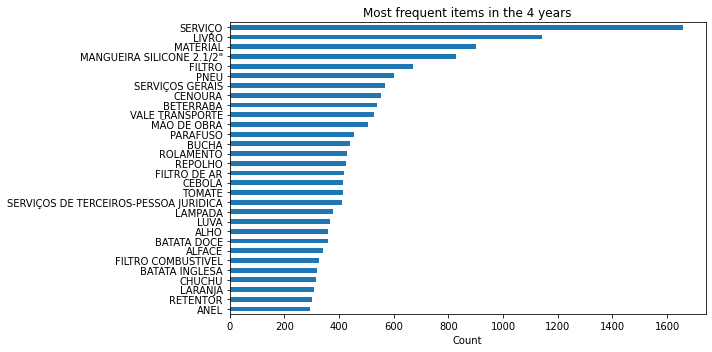

In [15]:
top = 30
from matplotlib.pyplot import figure

figure(figsize=(10, 5))
plt.title("Most frequent items in the 4 years")
combined_item['DS_ITEM'].value_counts()[:top].sort_values().plot.barh()
plt.xlabel("Count")
plt.tight_layout()


Ok, now we have the top 30 items that was bought. We can see that has some car stuffs and some foods. But, mostly, we have more the item "Serviço". But let's divide this by year: let's see the most common item bought divided by the year

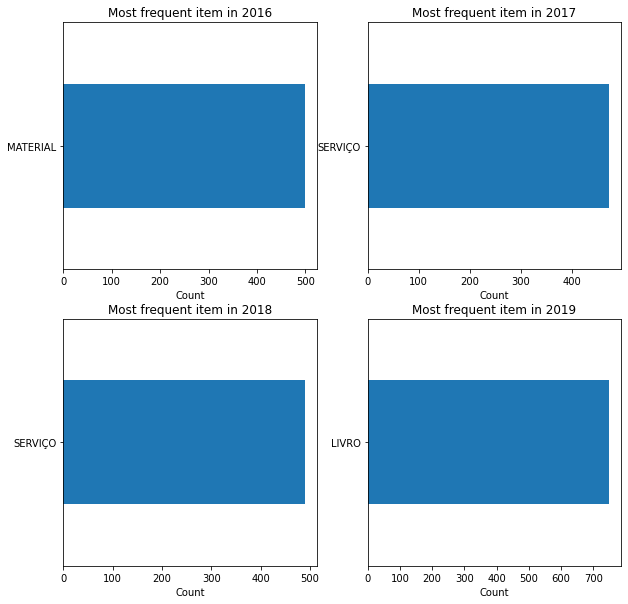

In [16]:
top = 1
from matplotlib.pyplot import figure
figure(figsize=(10, 10))
plot = 1
for i in ([2016, 2017, 2018, 2019]):
  plt.subplot(2,2,plot)
  plt.title("Most frequent item in " + str(i))
  combined_item['DS_ITEM'][combined_item['ANO_LICITACAO'] == i].value_counts()[:top].sort_values().plot.barh()
  plt.xlabel('Count')
  plot+=1

Now we can see that services wasn't all the time the most common bought item. We can see that in 2016 it was Material, and in 2019 was Livro the most common. But let's analyse how much was SPENT with these items. Because Serviço can be the most frequent, but not necessarily is the one that was most spent with it. \
let's analyse first with all the data, with all the 4 years.

In [17]:
items = combined_item['DS_ITEM'].value_counts()[:10].keys() # save the top items

most_freq_items = combined_item[combined_item['DS_ITEM'].isin(items)] #filtering the dataframe only with the top-10 most frequent items

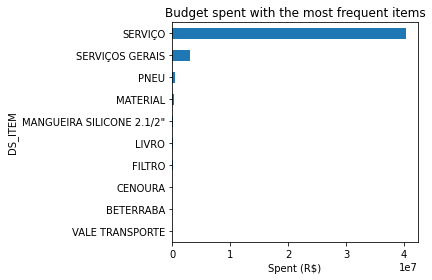

In [18]:
most_freq_items.groupby('DS_ITEM').sum()['VL_UNITARIO_HOMOLOGADO'].sort_values().plot.barh()
plt.title("Budget spent with the most frequent items")
plt.xlabel("Spent (R$)")
plt.tight_layout()

Ok, serviço is, by far, the item, between the most frequent ones, the most spent with it.

let's analyse this divider by year. That's it: how much was spent with the most frequent items by year?

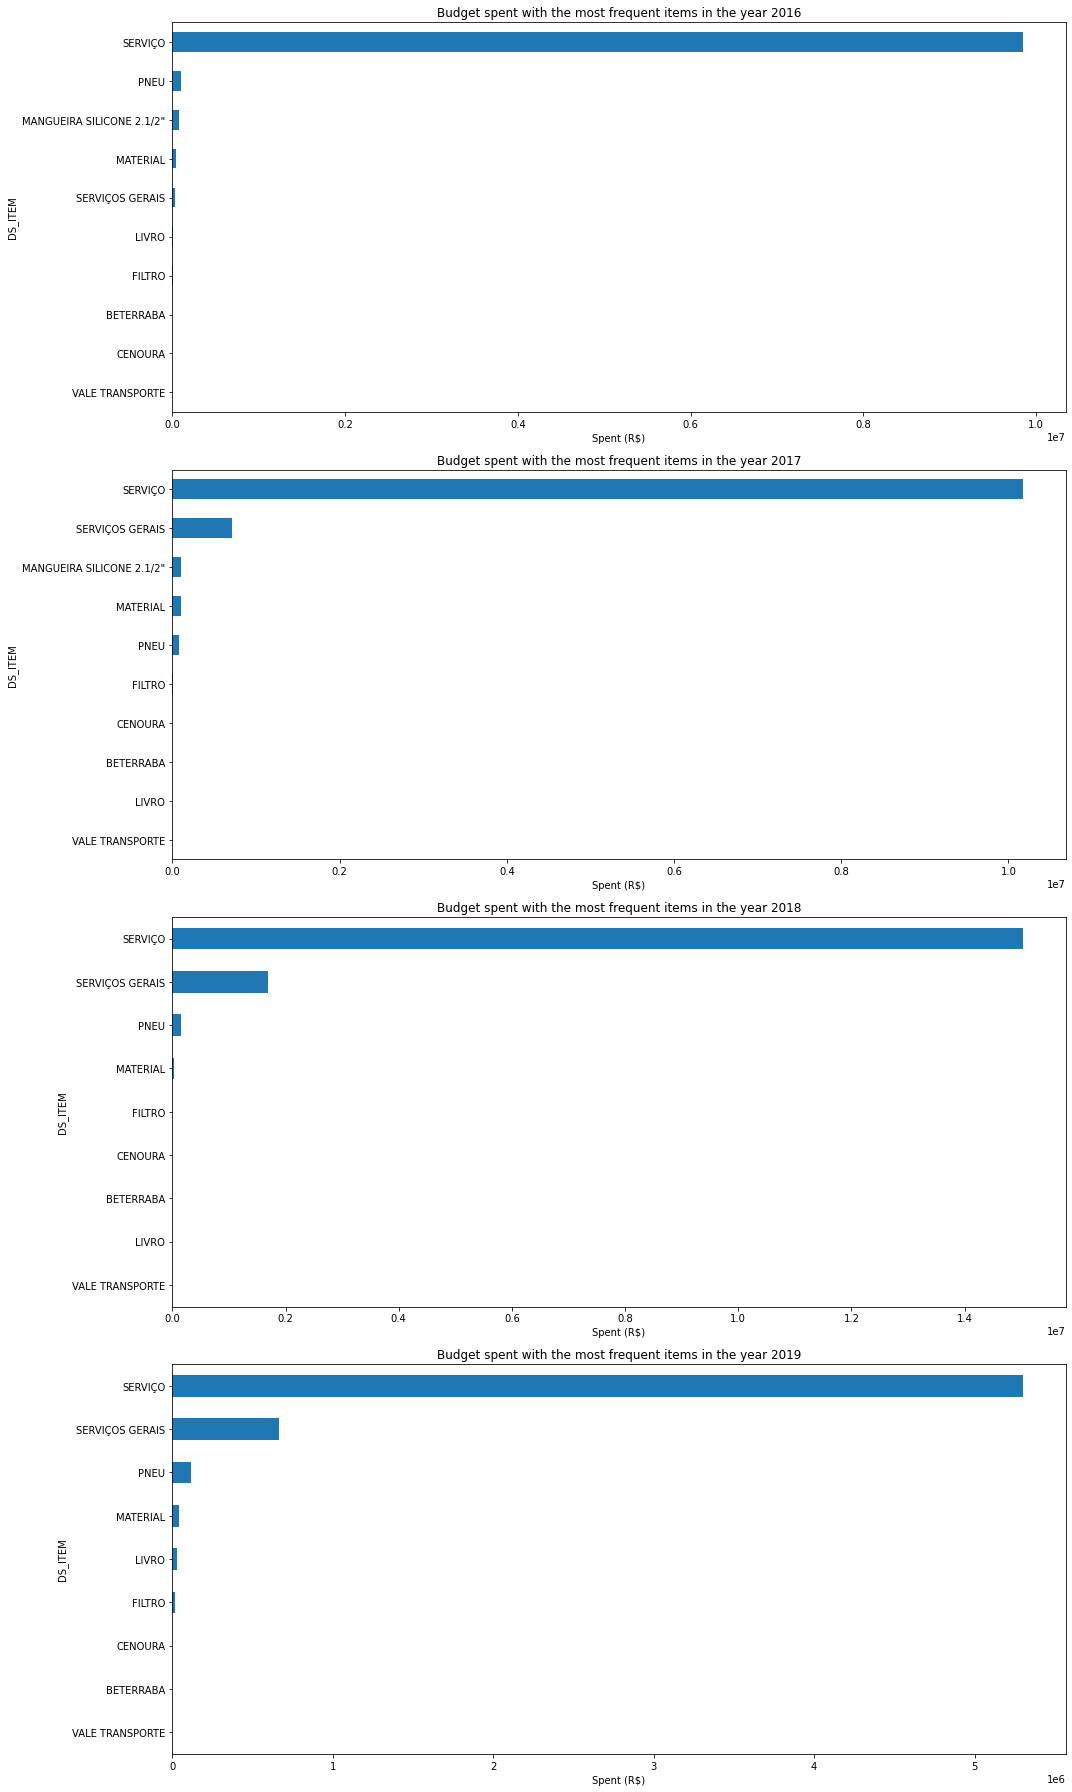

In [19]:
from matplotlib.pyplot import figure
figure(figsize=(15, 25))
plot = 1
for i in ([2016, 2017, 2018, 2019]):
  plt.subplot(4,1,plot)
  plt.title("Budget spent with the most frequent items in the year " + str(i))
  most_freq_items[most_freq_items['ANO_LICITACAO'] == i].groupby('DS_ITEM').sum()['VL_UNITARIO_HOMOLOGADO'].sort_values().plot.barh()
  plt.xlabel("Spent (R$)")  
  plot+=1
plt.tight_layout()

Every year, the Service was, among the most frequent, the one that most spent on it. So, even if it wasn't the most frequent each year, it is the most spent among all the most frequent ones.

Let's now check in the combined_licit dataframe what are those services, seeing the columns that specifies what are these licitations.

In [20]:
service_items = most_freq_items[most_freq_items['DS_ITEM'] == 'SERVIÇO'] # filtering only the serviços values
service_items.head()

,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM_ORIGINAL,DS_ITEM,VL_UNITARIO_HOMOLOGADO
15793,22.0,2016,PRP,1,6124,SERVIÇO,34711.41
33406,22.0,2016,PRP,1,6123,SERVIÇO,28260.30
37221,25.0,2016,PRP,1,6136,SERVIÇO,48600.00
40543,29.0,2016,PRP,1,19880,SERVIÇO,15500.00
72282,4.0,2016,TMP,1,5938,SERVIÇO,12830.95


here I am filtering in combined_licit only those fields that match with 'NR_LICITACAO',	'ANO_LICITACAO' and	'CD_TIPO_MODALIDADE' from service_items


In [21]:
merge_servico_licit = pd.merge(service_items, combined_licit, on=['NR_LICITACAO',	'ANO_LICITACAO',	'CD_TIPO_MODALIDADE'], how='inner')

merge_servico_licit.head()


,NR_LICITACAO,ANO_LICITACAO,CD_TIPO_MODALIDADE,NR_LOTE,NR_ITEM_ORIGINAL,DS_ITEM,VL_UNITARIO_HOMOLOGADO,NM_ORGAO_GERENCIADOR,DS_OBJETO,TP_OBJETO
0,22.0,2016,PRP,1,6124,SERVIÇO,34711.41,NaN,Aquisição de 60 t (sessenta toneladas) de Clor...,COM
1,22.0,2016,PRP,1,6123,SERVIÇO,28260.30,NaN,Aquisição de 60 t (sessenta toneladas) de Clor...,COM
2,22.0,2016,PRP,1,6125,SERVIÇO,NaN,NaN,Aquisição de 60 t (sessenta toneladas) de Clor...,COM
3,25.0,2016,PRP,1,6136,SERVIÇO,48600.00,NaN,Aquisição de 90 t (noventa toneladas) de Cloro...,COM
4,29.0,2016,PRP,1,19880,SERVIÇO,15500.00,NaN,Aquisição de lacres antifraude para extremidad...,COM


Creating a dataframe to see, in the licitation dataframe, what are these items called "serviço"

In [22]:
dict_servico_licit = {'Licitation description':merge_servico_licit['DS_OBJETO'].value_counts().keys(), 'counts':merge_servico_licit['DS_OBJETO'].value_counts().values}
df_servico_licit = pd.DataFrame(dict_servico_licit)
df_servico_licit.head()

,Licitation description,counts
0,CONTRATAÇÃO DE HORAS MECÂNICAS PARA MANUTENÇÃO...,45
1,Aquisição de alimentos não perecíveis.,45
2,Aquisição de equipamento visando atender as ne...,29
3,AQUISIÇÃO EMERGENCIAL DE 9.000M³ DE OXIGÊNIO L...,24
4,"AQUISIÇÃO DE VEICULO AMBULANCIA TIPO A, ZERO K...",24




Here we can see what these "Service" items are. Mainly, they are related to bids on hiring hours in auto mechanics, or on the acquisition of some materials (food, equipment, vehicles, etc.).



Here we can conclude some patterns observed: Service is, in the four years, the most purchased item, but not in all years: in 2016 it was material and in 2019 it was book. But, if we plot the histogram to analyze how much was spent on the most frequent items, service, in all years, was the most frequent item


let's analyze now how much percent the Serviço represents from the state's budget. I expect that can be a high percentage. 


In [23]:
servico_sum = combined_item['VL_UNITARIO_HOMOLOGADO'][combined_item['DS_ITEM'] == 'SERVIÇO'].sum()
total_sum = combined_item['VL_UNITARIO_HOMOLOGADO'].sum()

pct_servico = (servico_sum/total_sum)*100
print('In 4 years, the state spent with licitations R$ ' + str(np.round(total_sum)))
print(' -------------------------------------------------------- ')
print('R$ ' + str(np.round(servico_sum)) + ' was with serviço item')
print(' -------------------------------------------------------- ')
print('Serviço represents ' + str(np.round(pct_servico)) + '% of the total budget spent')

In 4 years, the state spent with licitations R$ 3618477301.0
 -------------------------------------------------------- 
R$ 40359705.0 was with serviço item
 -------------------------------------------------------- 
Serviço represents 1.0% of the total budget spent


The result is not what I was expecting, maybe can have some items that are not so frequent, mas are more expensive than Serviço.

let's analyze one other thing: how much was spent in each year, the mean of budget spent and it deviation.

In [24]:
budget_spent = []
for i in ([2016, 2017, 2018, 2019]):
    print('In ' + str(i) + ' was spent an amount of R$ '+
    str(np.round(combined_item['VL_UNITARIO_HOMOLOGADO'][combined_item['ANO_LICITACAO'] == i].sum())))
    # here i am saving in a list how much was spent by year just to make some calculations on it
    budget_spent.append(np.round(combined_item['VL_UNITARIO_HOMOLOGADO'][combined_item['ANO_LICITACAO'] == i].sum()))


In 2016 was spent an amount of R$ 716166857.0
In 2017 was spent an amount of R$ 548529809.0
In 2018 was spent an amount of R$ 1639339811.0
In 2019 was spent an amount of R$ 714440824.0


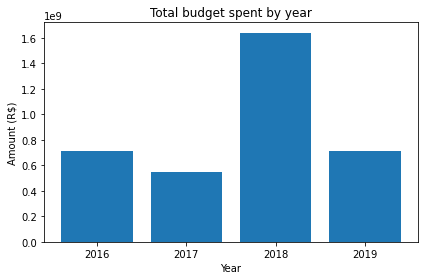

In [25]:
plt.title("Total budget spent by year")
plt.xlabel('Year')
plt.ylabel('Amount (R$)')
plt.bar(['2016', '2017', '2018', '2019'], budget_spent)
plt.tight_layout()

In [26]:
print('The mean + std of amount spent is R$ ' + str(np.round(np.mean(budget_spent))) + ' +/- R$ ' + str(np.round(np.std(budget_spent))))


The mean + std of amount spent is R$ 904619325.0 +/- R$ 429620801.0


So we can see here that the year that had the biggest budget spent was in 2018. But its a lot of difference!

let's see now how much percent the amount spent in 2018 represents in the total spent on the four years

In [27]:
print(str(np.round(budget_spent[2]/np.sum(budget_spent)*100)) + '%')

45.0%


That's a high percentage! Almost 50% of the total amount from 2016 to 2019 was spent in 2018. But why?

We know that the elections for the governor of RS happened in 2018, maybe can be this, and is known that, in these years of elections, the number of constructions in the cities increase. But we need to check if it was that what happened.


We know that, as previously presented in a bar chart, that the most frequent item in 2018 was with the Serviço, and we know that this Serviço, among the most frequent items, was the one that spent the most on it. But let's look at all the data: what money, in general, was this spent on?

Why I am doing that? Because I suspect that, even if Serviço is the most frequent item, and, between the most frequent ones, it has the highest budget, he represents only 1% of the entire budget of the total amount along the 4 years. So I think that other items, not so frequents, has more budget than Serviço. For that, I need to analyze in the entire data.

In [28]:
# printing the items that have the highest budget
df_2018 = pd.DataFrame(combined_item[combined_item['ANO_LICITACAO'] == 2018].groupby('DS_ITEM')['VL_UNITARIO_HOMOLOGADO'].sum().sort_values(ascending=False)[:10])
df_2018.head()


,VL_UNITARIO_HOMOLOGADO
DS_ITEM,
EXECUÇÃO DE OBRAS DE INFRAESTRUTURA ELÉTRICA PARA AGÊNCIA CAIBATÉ/RS,2.075000e+08
"EXECUÇÃO DE OBRAS CIVIS, ELÉTRICAS, MECÂNICAS, LÓGICAS, SEGURANÇA E AUTOMAÇÃO, EQUIPAMENTOS E PPCI DO EDIFÍCIO DATA CENTER DO BANRISUL NA CIDADE DE PORTO ALEGRE/RS.",6.154296e+07
AMPLIAÇÃO E MODERNIZAÇÃO DA ETE MATO GRANDE EM CANOAS/RS.,4.840583e+07
SUREG PORTO ALEGRE E SEDE (AG. CENTRAL),3.969435e+07
SUBSTITUIÇÃO,3.120285e+07


The descriptions of the items are very large, so is difficult to plot and see. But we can see that the money was most spent with constructions and maintenance of some cities in 2018, that's why in 2018 the money spent is bigger than other years, these are things that has high budget!

 Coincidentally, was the year of the elections to RS' governor.


let's see, in each year, what was the item that spent the biggest amount of money, in general.

In [29]:
for i in ([2016, 2017, 2018, 2019]):
    # making some logs about the name of the items that had the highest budget
    print('----------------------------------------------------------')
    print('The biggest amount of money was spent with "' + 
    str(combined_item[combined_item['ANO_LICITACAO'] == i].groupby('DS_ITEM')['VL_UNITARIO_HOMOLOGADO'].sum().sort_values(ascending=False).keys()[0]) + '" in the year of ' + str(i))


----------------------------------------------------------
The biggest amount of money was spent with "CONSTRUÇÃO DO HOSPITAL PUBLICO REGIONAL" in the year of 2016
----------------------------------------------------------
The biggest amount of money was spent with "Contratação de prestação de serviços continuados sem dedicação exclusiva de mão de obra, de Desenvolvimento, Manutenção e Migração de Sistemas Informatizados em regime de FÁBRICA DE SOFTWARE, de Consultoria Técnica Especializada e Mentoring em Metodologia Ágil e em Design Thinking, de acordo com as " in the year of 2017
----------------------------------------------------------
The biggest amount of money was spent with "EXECUÇÃO DE OBRAS DE INFRAESTRUTURA ELÉTRICA PARA AGÊNCIA CAIBATÉ/RS                                                                                                                                                                                                                                                

So we can see, above, with which item the biggest amount of money was spent in each year.

This may conclude something I've noticed before: Serviço is the most frequent item, the one spent the most of all the most frequent items, but it's not the one of the **ALL** items that has the biggest budget. Buildings have the highest budget and the state spent most of its annual budget on them.

# Now let's analyze these data by the organ's names, instead the years.

We already know the items that was most spent on it, as introduced above, so let's check which organ spent with these items.

First we need to save the licitations keys of these items, to check in the dataframe of licitations (combined_licit)


In [30]:
items = []
for i in  ([2016,2017,2018,2019]):
    # saving the name of these items to consult the licitations keys
    items.append(combined_item[combined_item['ANO_LICITACAO'] == i].groupby('DS_ITEM')['VL_UNITARIO_HOMOLOGADO'].sum().sort_values(ascending=False).keys()[0])

In [31]:
years = [2016, 2017, 2018, 2019]
for i in range (len(items)):
    print('------------------------------------------------------------')
    print( 'The name of the organ that spent with the biggest budget items in year ' + str(years[i]) + ' is '+ 
        str(pd.merge(combined_item[combined_item['DS_ITEM'] == items[i]], combined_licit, on=['NR_LICITACAO', 'ANO_LICITACAO', 'CD_TIPO_MODALIDADE'], how='inner')['NM_ORGAO_GERENCIADOR']
    ))



------------------------------------------------------------
The name of the organ that spent with the biggest budget items in year 2016 is Series([], Name: NM_ORGAO_GERENCIADOR, dtype: object)
------------------------------------------------------------
The name of the organ that spent with the biggest budget items in year 2017 is Series([], Name: NM_ORGAO_GERENCIADOR, dtype: object)
------------------------------------------------------------
The name of the organ that spent with the biggest budget items in year 2018 is Series([], Name: NM_ORGAO_GERENCIADOR, dtype: object)
------------------------------------------------------------
The name of the organ that spent with the biggest budget items in year 2019 is 0    NaN
Name: NM_ORGAO_GERENCIADOR, dtype: object


Unfortunately, in this data is not specified the name of these organs.

# Conclusion

So, after the anlysis, we can conclude that:
1. "Serviço" is the most frequent item in general \
    1.1 He is related to some automotive maintenance, aquisition of some stuffs related to foods, car and etc.
2. The others most frequent items is about some foods, books, pieces of equipments and etc
3. "Serviço" was not the most frequent item in the 4 years, like in 2016 and 2019
4. He is, between the most frequent items, the one that was most spent on it.
5. In 2018 was spent a huge amount of money, resulting in almost 50% of the total amount in the 4 years. \
    5.1 This money spent is related, mostly, about public constructions in this year, and, coincidentally, was the year of the RS' elections for governor.
6. The item has the biggest budget, in general, every year, is related to constructions
7. Even though "Serviço" is the most frequent item, and, among the most frequent items, it is the most spent on, it is not, among all the items,
the most spent on by the state. The state spends most of its annual budget on public construction and renovation of streets, hospitals, etc.

### So we can see a pattern in the items bought: Stuffs related to constructions, car maintance, foods and contracts about services is the most common bought items. However, the state spend the biggest part of your budget in constructions (hospitals, streets and etc)

### Otherwise, the year that has the highest budget is in 2018, almost 50% of the entire budget in the 4 years (2016, 2017, 2018, 2019). Coincidentally,  in this year, happened the elections for governor in the RS state, and is known that, in these years of elections, the number of public constructions increase, how was introduced and proved before when showed in what the state spent more in 2018.

